Yes, I'm familiar with the Duffing equation. The Duffing equation is a second-order ordinary differential equation commonly used to describe the behavior of a nonlinear oscillator. It takes the following form:

$$ 
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos(\omega t)
$$

Where:
- $ x$  is the displacement of the oscillator from its equilibrium position as a function of time $ t$ .
- $ \delta$  represents the damping coefficient, which governs the rate at which the oscillations decay over time due to damping.
- $ \alpha$  is the linear stiffness coefficient.
- $ \beta$  is the coefficient of the cubic nonlinear term, which introduces nonlinearity to the system.
- $ \gamma$  is the amplitude of an external periodic driving force with frequency $ \omega$ .

The Duffing equation is important in the study of nonlinear dynamics and chaos theory, as it can exhibit complex and chaotic behavior under certain conditions. Depending on the parameter values and initial conditions, the system can display a range of behaviors, including periodic oscillations, subharmonic motion, chaotic motion, and more.

The Duffing equation has been used in various fields such as physics, engineering, and applied mathematics to model a variety of physical systems, including mechanical vibrations, electrical circuits, and chemical reactions. It serves as a simple yet rich example of how nonlinearity in a dynamical system can lead to intricate and unexpected behavior.

In [1]:
import torch
import os
import generator
import numpy as np
import matplotlib.pyplot as plt

def save_results_to_file(file_name:str, tensor:np.array):
    np.save(file_name, tensor)


In [8]:
# Example usage
alpha =-1.0
beta  = 1.0
delta = 0.3
omega = 1.2
step_frequency = 10
t_span = (0, 50_000)
_Start = 500*step_frequency

for gamma in [0.2,0.37,0.50]:
    for step_frequency in [1,10,50]:
        for initial_conditions in reversed([[0.5, 0.0],[1.5, -1.5],[-0.5, 0.5],[1.5, 1.5]]):
            t, x,v,a = generator.solve_duffing_equation(delta, alpha, beta, gamma, omega,
                                            t_span,
                                            initial_conditions,
                                            num_points=(t_span[1]-t_span[0])*step_frequency)
            save_results_to_file(os.path.join('datasets',f"{gamma=:0.2f} {t_span=} {initial_conditions=} {step_frequency=:03d}"),a[_Start:])


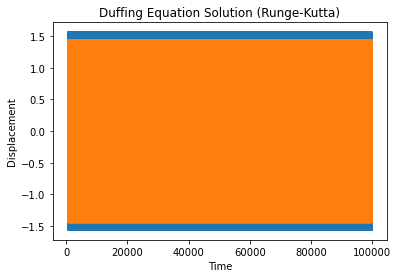

In [3]:
_Start = 500*step_frequency
# Plot the displacement over time
plt.plot(t[_Start:],a[_Start:])
# plt.plot(t,v)
plt.plot(t[_Start:],x[_Start:])

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Duffing Equation Solution (Runge-Kutta)')
plt.show()


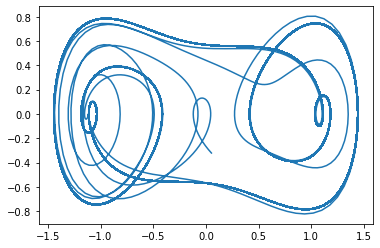

In [4]:
_Start = 20*10
_End   = -1
plt.plot(x[_Start:_End],v[_Start:_End])


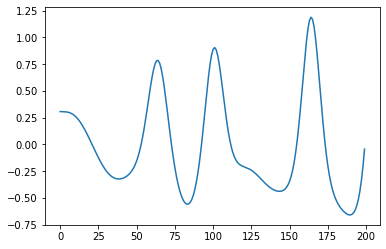

In [5]:
plt.plot(a[_Start:400])
